In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
from random import shuffle
import matplotlib.pyplot as plt
import numpy as np

In [8]:
distributions = [
    "gamma",
    "expon",
    "lognorm",
    "weibull_min",  
    "weibull_max",
]

P Value: 0.2768825379652561


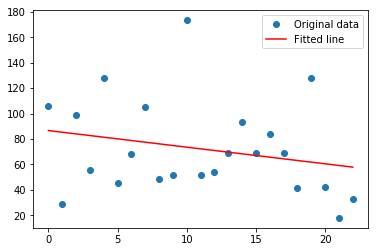

In [9]:
data = np.loadtxt("data.txt")
x = np.array([i for i in range(len(data))])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, data)
print("P Value:",p_value)
plt.plot(x, data, 'o', label='Original data')
plt.plot(x, intercept + slope*x, 'r', label='Fitted line')
plt.legend()
plt.show()

In [10]:
if(p_value>0.05):
    r = (np.correlate(x-x.mean(),x-x.mean(), mode='full'))/(x.var()*len(x))
    auto_cor = r[r.size//2:]
    print("Autocorrelation:",auto_cor)

else:
    print("P value is less than 0.05")

Autocorrelation: [ 1.          0.86956522  0.74011858  0.61264822  0.48814229  0.36758893
  0.25197628  0.14229249  0.03952569 -0.05533597 -0.14130435 -0.2173913
 -0.2826087  -0.33596838 -0.37648221 -0.40316206 -0.41501976 -0.41106719
 -0.39031621 -0.35177866 -0.2944664  -0.2173913  -0.11956522]


RESULTS:

gamma - 0.9466259040999688
expon - 0.1767610631020464
lognorm - 0.9655682669522782
weibull_min - 0.908797329790544
weibull_max - 4.9542836445592953e-17

The distribution associated with the dataset is lognorm with p value 0.9655682669522782


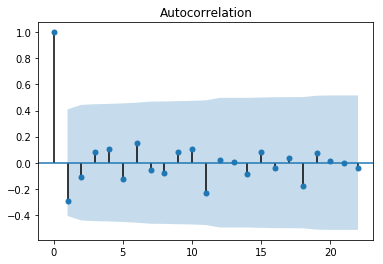

In [11]:
dist_results = []
for dist_name in distributions:
    dist = getattr(stats, dist_name)
    param = dist.fit(data)
    D, p = stats.kstest(data, dist_name, args=param);
    dist_results.append((dist_name,p))
aux_p = 0
aux_dist = ""
print("RESULTS:\n")
for dist in dist_results:
    print(dist[0]+" - "+str(dist[1]))
    if(aux_p<dist[1]):
        aux_p = dist[1]
        aux_dist = dist[0]
print("\nThe distribution associated with the dataset is {0} with p value {1}".format(aux_dist,aux_p))
plot_acf(data)#grafica
plt.show()